#LABORATORIO 06
---
```
Universidad Nacional de San Antonio Abad del Cusco
Asignatura: Deep Learning
Docente   : Ivan Cesar Medrano Valencia
Autor     : Etson Ronaldao Rojas Cahuana
Fecha     : 13/12/2021
Lugar     : Cusco, Perú
Proposito : 1.   Utilice como optimizador el Gradiente Descendente con una tasa de aprendizaje 0.0001.
            2.   Agregue el código necesario para hacer predicciones de imágenes de dígitos
                 manuscritos.
```
---

**1.	Importe tensorflow.keras.datasets.mnist como mnist:**

In [ ]:
import tensorflow.keras.datasets.mnist as mnist

**2.	Cargue el conjunto de datos mnist usando mnist.load_data() y guarde los resultados en (features_train, label_train), (features_test, label_test):**

In [ ]:
(features_train, label_train), (features_test, label_test) = mnist.load_data()

**3.	Imprime el contenido de label_train:**

In [ ]:
label_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**4.	Imprime la forma del conjunto de entrenamiento:**

In [ ]:
features_train.shape

(60000, 28, 28)

**5.	Imprima la forma del conjunto de prueba:**

In [ ]:
features_test.shape

(10000, 28, 28)

**6.	Cambie la forma de los conjuntos de entrenamiento y prueba con las dimensiones (number_observations, 28, 28, 1):**

In [ ]:
features_train = features_train.reshape(60000, 28, 28, 1)
features_test = features_test.reshape(10000, 28, 28, 1)

**7.	Estandarice features_train y features_test dividiéndolos entre 255:**

In [ ]:
features_train = features_train / 255.0
features_test = features_test / 255.0

**8.	Importe numpy como np, tensorflow como tf y layers de tensorflow.keras:**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

**9.	Establezca 8 como semilla para numpy y tensorflow usando np.random_seed() y tf.random.set_seed (), respectivamente:**

In [ ]:
np.random.seed(8)
tf.random.set_seed(8)

**10.	Cree una instancia de una clase tf.keras.Sequential () y guárdela en una variable llamada modelo:**

In [ ]:
model = tf.keras.Sequential()

**11.	Cree una instancia de una clase layer.Conv2D () con 64 núcleos de forma (3,3), activación = 'relu' y input_shape = (28,28,1), y guárdelo en una variable llamada conv_layer1:**

In [ ]:
conv_layer1 = layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1))

**12.	Cree una instancia de una clase layer.Conv2D () con 64 núcleos de forma (3,3) y activación = 'relu' y guárdela en una variable llamada conv_layer2:**

In [ ]:
conv_layer2 = layers.Conv2D(64, (3,3), activation='relu')

**13.	Cree una instancia de la clase layer.Flatten () con 128 neuronas, activación = 'relu', y guárdela en una variable llamada fc_layer1:**

In [ ]:
fc_layer1 = layers.Dense(128, activation='relu')

**14.	Cree una instancia de la clase layer.Flatten () con 10 neuronas, activación = 'softmax', y guárdela en una variable llamada fc_layer2:**

In [ ]:
fc_layer2 = layers.Dense(10, activation='softmax')

**15.	Agregue las cuatro capas que acaba de definir al modelo usando .add (), agregue una capa MaxPooling2D () de tamaño (2,2) entre cada una de las capas de convolución y agregue una capa Flatten() antes de la primera capa completamente conectada para aplanar los mapas de características:**

In [ ]:
model.add(conv_layer1)
model.add(layers.MaxPooling2D(2, 2))
model.add(conv_layer2)
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(fc_layer1)
model.add(fc_layer2)

**16.	Cree una instancia de una clase tf.keras.optimizers.SGD (Gradiente descendente) con 0.0001 como tasa de aprendizaje y guárdela en una variable llamada optimizer:**

In [ ]:
optimizer = tf.keras.optimizers.SGD(0.0001)

**17.	Compile la red neuronal usando .compile() con loss = 'sparse_ categorical_crossentropy', optimizer = optimizer, metrics = ['precision']:**

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

**18.	Imprime el resumen del modelo:**

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

**19.	Ajuste las redes neuronales con el conjunto de entrenamiento y especifique epochs = 20, validation_split = 0.2 y verbose = 2:**

In [ ]:
model.fit(features_train, label_train, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
1500/1500 [==============================] - 48s 32ms/step - loss: 2.1933 - accuracy: 0.4192 - val_loss: 2.1758 - val_accuracy: 0.4642
Epoch 2/20
1500/1500 [==============================] - 49s 33ms/step - loss: 2.1610 - accuracy: 0.4916 - val_loss: 2.1387 - val_accuracy: 0.5444
Epoch 3/20
1500/1500 [==============================] - 49s 33ms/step - loss: 2.1194 - accuracy: 0.5670 - val_loss: 2.0903 - val_accuracy: 0.6175
Epoch 4/20
1500/1500 [==============================] - 50s 33ms/step - loss: 2.0643 - accuracy: 0.6257 - val_loss: 2.0255 - val_accuracy: 0.6724
Epoch 5/20
1500/1500 [==============================] - 49s 33ms/step - loss: 1.9899 - accuracy: 0.6684 - val_loss: 1.9374 - val_accuracy: 0.6944
Epoch 6/20
1500/1500 [==============================] - 49s 33ms/step - loss: 1.8889 - accuracy: 0.6844 - val_loss: 1.8185 - val_accuracy: 0.7025
Epoch 7/20
1500/1500 [==============================] - 49s 33ms/step - loss: 1.7554 - accuracy: 0.6898 - val_loss: 1.6644 -

**20.	Evaluemos el rendimiento del modelo en el conjunto de pruebas:**

In [ ]:
model.evaluate(features_test, label_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.4602 - accuracy: 0.8760


[0.4602177143096924, 0.8759999871253967]

#Prediccion

**1. Importar libreria necesaria para visualizar imagen y crear las etiquetas especificas**

In [ ]:
import matplotlib.pyplot as plt
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro',
               'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve']

**2. Mostrar 20 primeras imagenes con sus determinadas etiquetas del conjunto de datos de test.**

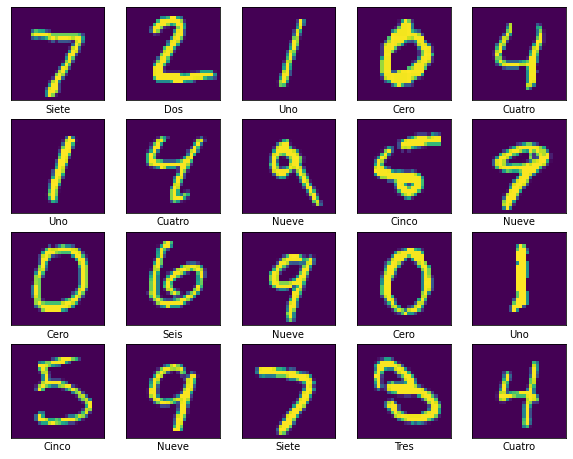

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tf.squeeze(features_test[i]))
    plt.xlabel(class_names[label_test[i]])
plt.show()

**3. Mostrar 20 primeras imagenes pero binarizadas del conjunto de datos de test.**

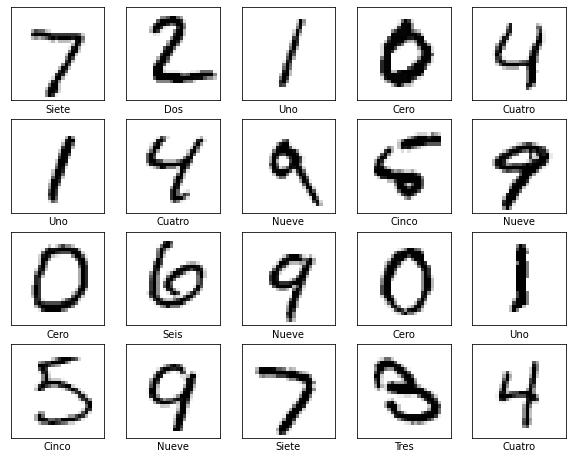

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tf.squeeze(features_test[i]), cmap=plt.cm.binary)
    plt.xlabel(class_names[label_test[i]])
plt.show()

**4. Predecir con los datos de test**

In [ ]:
predictions = model.predict(features_test)

**5. Construir modulos para predecir y para mostrar las imagenes**

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.title('Imagen de entrada')
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.title('Predicción')
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

def Mostrar_Prediccion_Individual(indice, predictions, features_test):
  predictions_array, true_label = predictions[indice], label_test
  predicted_label = np.argmax(predictions_array)
  print("====PREDICCIÓN====\nLabel de prediccion: {}\nPrecision {:2.0f}%\n(Label verdadero: {})\n".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label[indice]]))
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(indice, predictions[indice], label_test, tf.squeeze(features_test))
  plt.subplot(1,2,2)
  plot_value_array(indice, predictions[indice],  label_test)
  plt.show()

def Mostrar_Prediccion_Varios(filas,columnas, predictions, features_test):
  num_rows = filas
  num_cols = columnas
  num_images = num_rows*num_cols
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], label_test, tf.squeeze(features_test))
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], label_test)
  plt.tight_layout()
  plt.show()

**6. Mostrar prediccion para una imagen, en este caso para la primera imagen de todo el conjunto de datos para el test.**

====PREDICCIÓN====
Label de prediccion: Siete
Precision 100%
(Label verdadero: Siete)



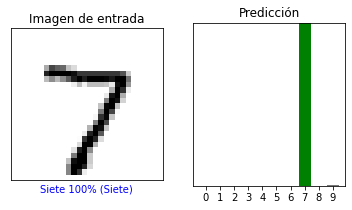

In [ ]:
#Prediccion con los datos de test, muestra el primer elemento "0"
Mostrar_Prediccion_Individual(0, predictions, features_test)

**7. Mostrar prediccion de las 20 primeras imagenes del conjunto de datos para el test**

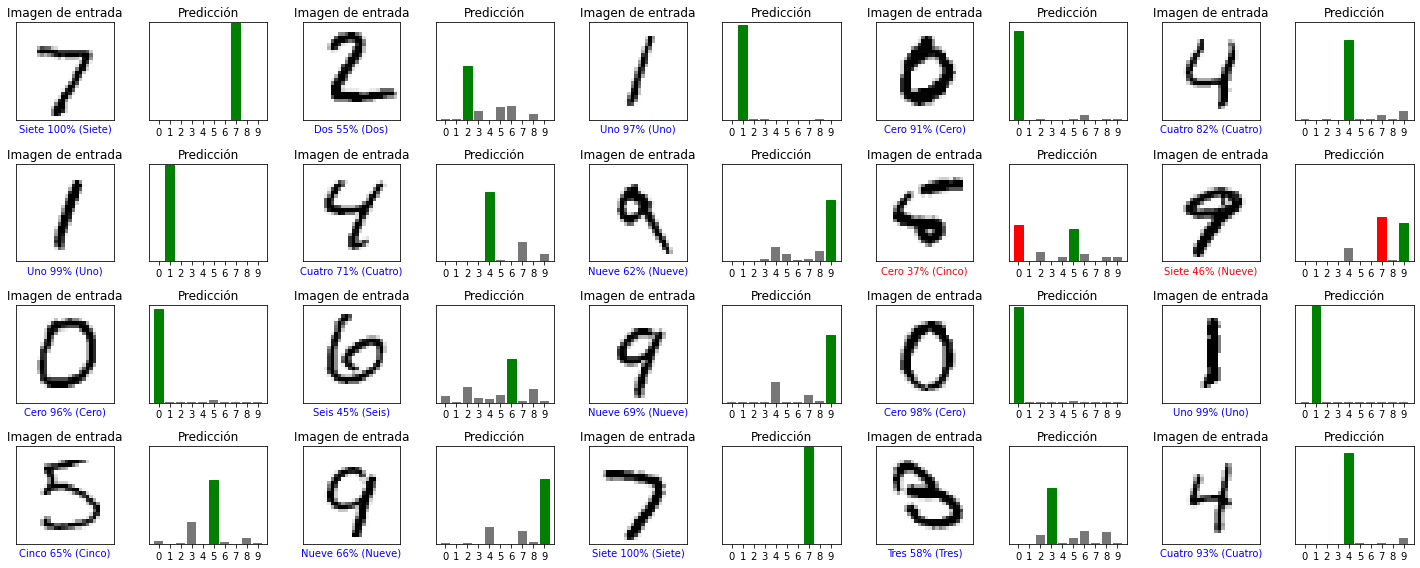

In [ ]:
#Prediccion con los datos de test, mostrar las 4 filas y 5 columnas
Mostrar_Prediccion_Varios(4, 5, predictions, features_test)